# DRIVER INSURANCE CLAIM PREDICTION PROJECT

In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reading the data and looking into few instances of data and replacing -1 with NaN as given in data description
autoins_df = pd.read_csv('train.csv',na_values=[-1])
autoins_df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [ ]:
#Checking the size of data
autoins_df.shape

(595212, 59)

## PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [ ]:
#Checking the attribute types
autoins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  float64
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  float64
 6   ps_ind_05_cat   589403 non-null  float64
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [ ]:
#Checking statistical values of all attributes and target
autoins_df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,594996.000000,595212.000000,595129.000000,589403.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359799,4.423318,0.416992,0.419038,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663193,2.699902,0.493062,1.350023,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### HANDLING NAN VALUES

In [ ]:
#Checking the NaN values per attribute
autoins_df.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


### HANDLING CORRELATION

In [ ]:
#Dropping the first four attributes having high number of NaN values
drop_columns = list(autoins_df.isna().sum().sort_values(ascending=False).head(4).index)
autoins_df.drop(drop_columns, inplace=True, axis=1)
#dropping NA values from remaining attributes
autoins_df.dropna(inplace=True)
#dropping id values
autoins_df.drop(['id'], axis=1, inplace=True)

print(f'Dropped_Columns: {drop_columns}')
print(f'\n Shape of data after Cleaning: {autoins_df.shape}')

Dropped_Columns: ['ps_car_03_cat', 'ps_car_05_cat', 'ps_reg_03', 'ps_car_14']

 Shape of data after Cleaning: (582847, 54)


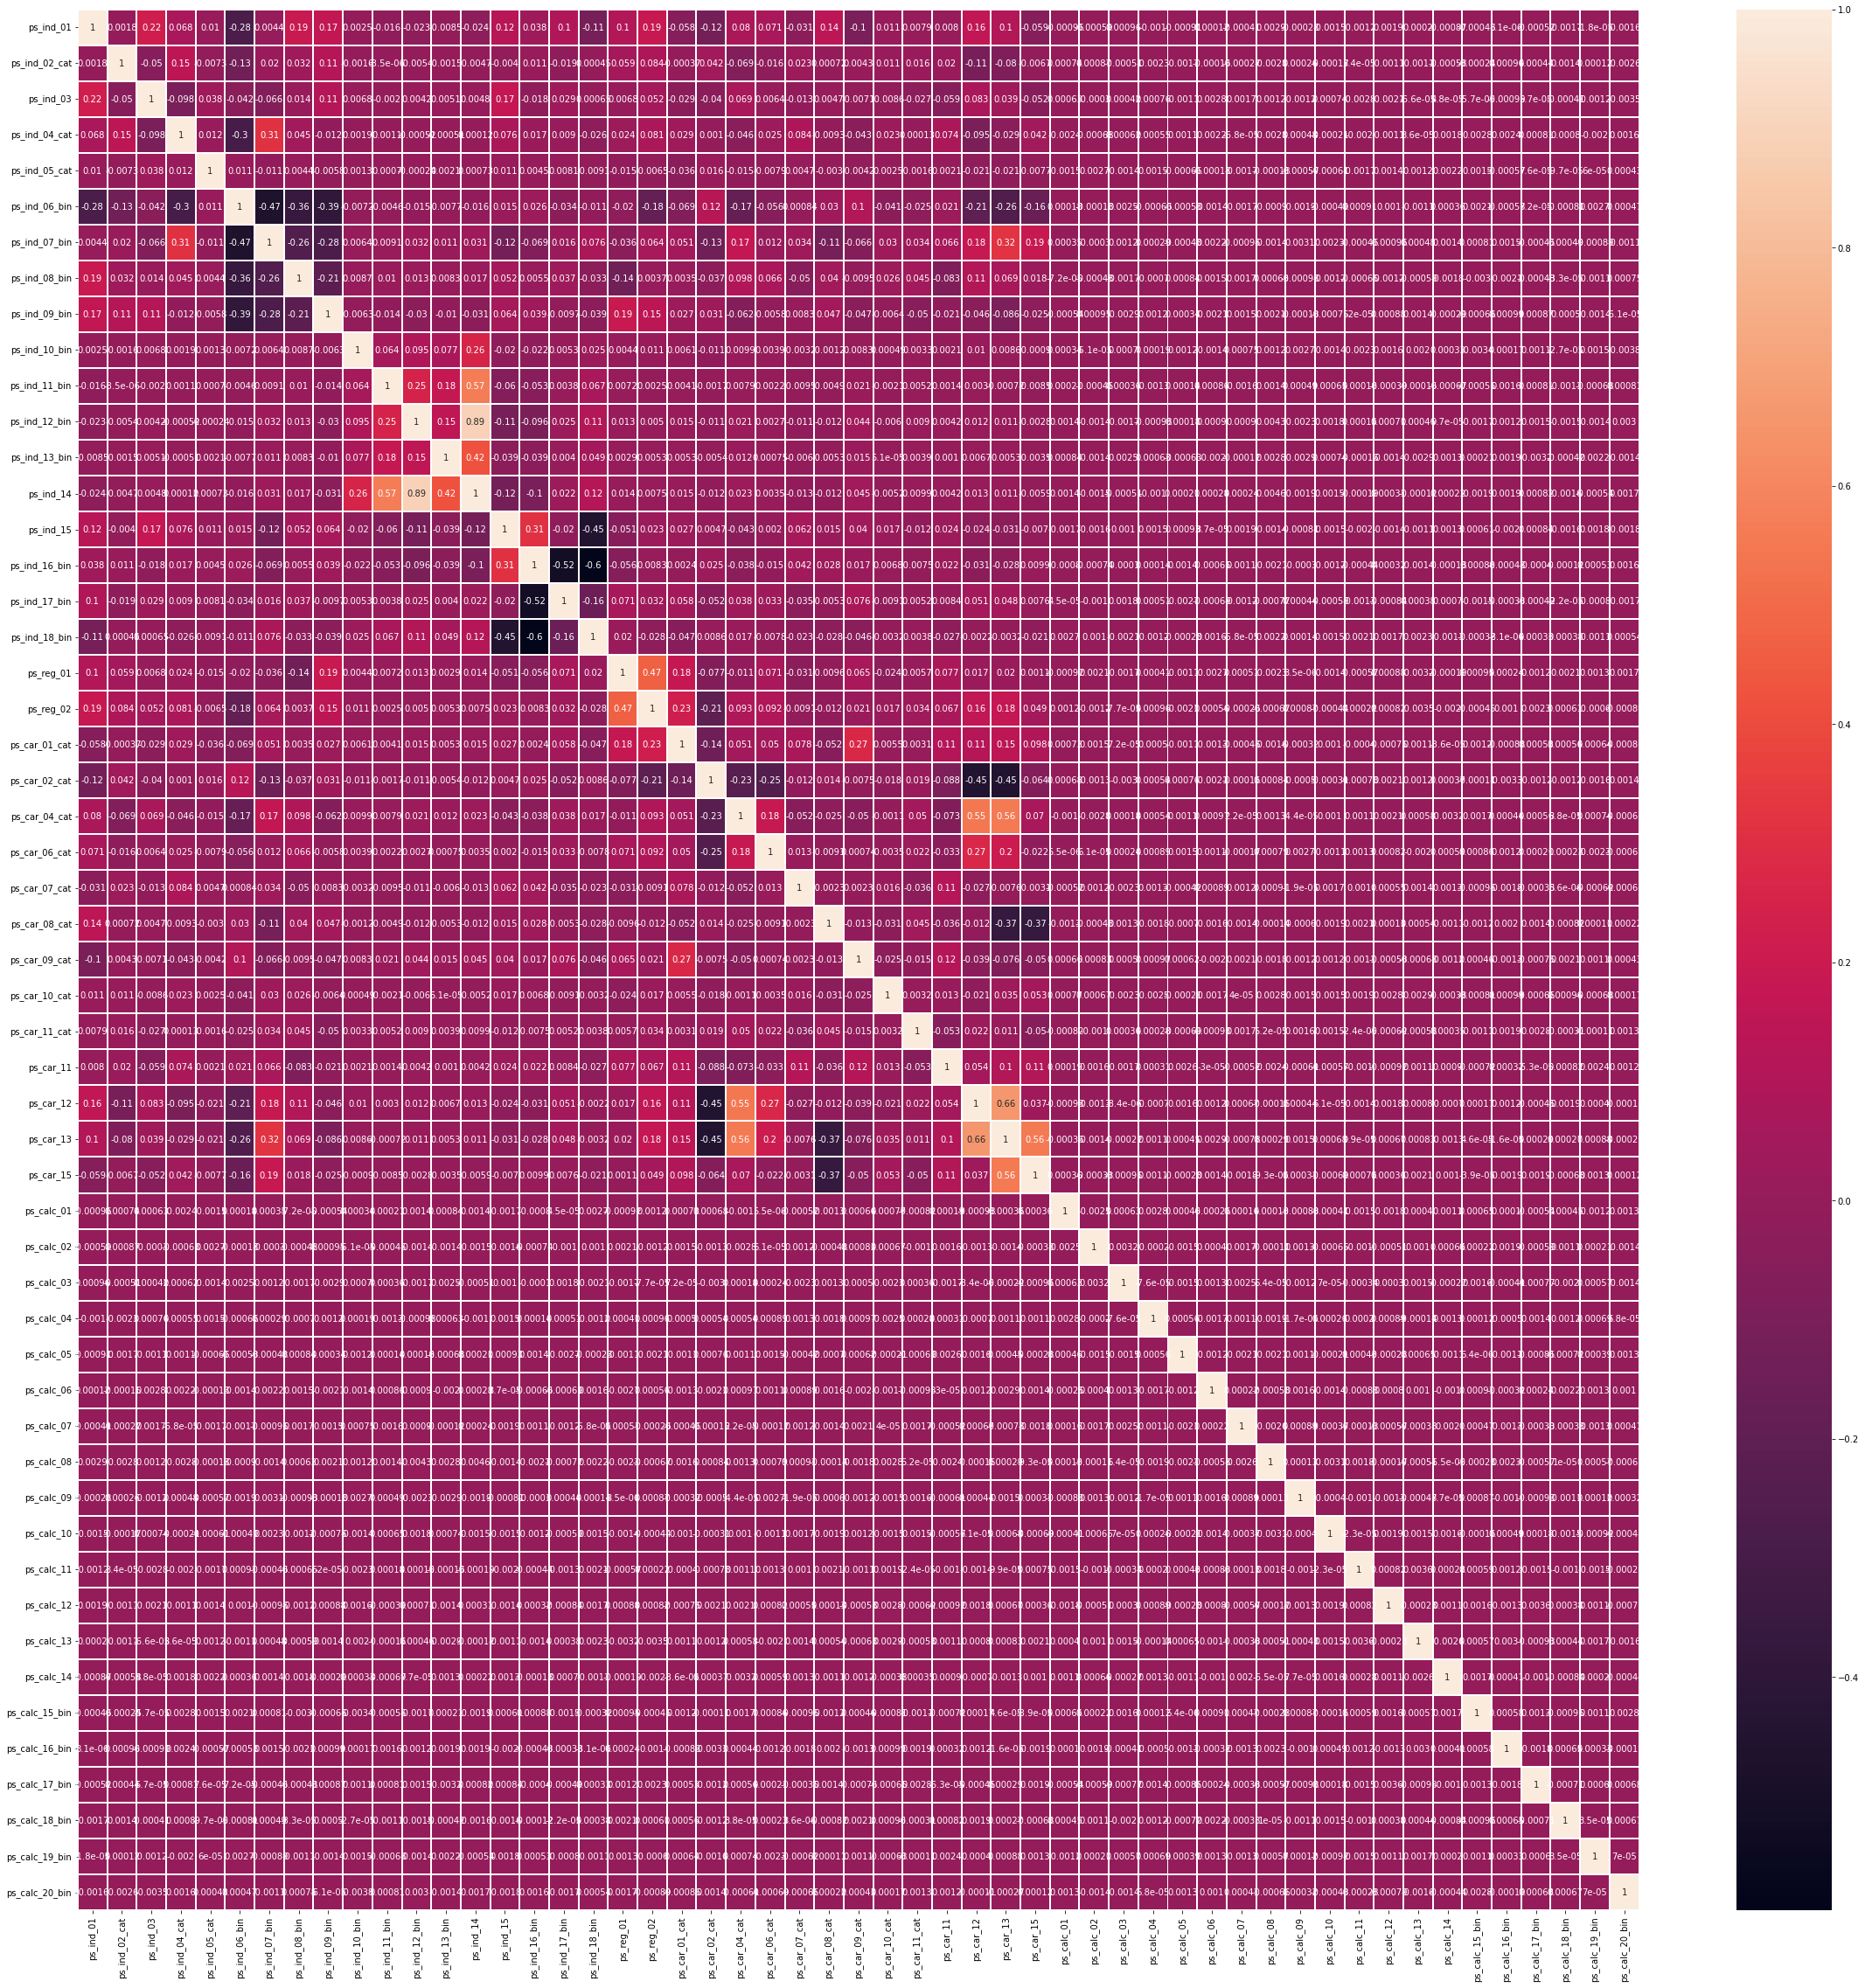

In [ ]:
#Finding the correlation between attributes 
corr_matrix = autoins_df.corr().loc['ps_ind_01':'ps_calc_20_bin','ps_ind_01':'ps_calc_20_bin']
#corr_matrix = autoins_df.corr().loc['ps_ind_01':'ps_reg_03','ps_ind_01':'ps_reg_03']
#Plotting heatmap
plt.figure(figsize=(40,40))
sns.heatmap(corr_matrix, annot=True,linewidths='1')

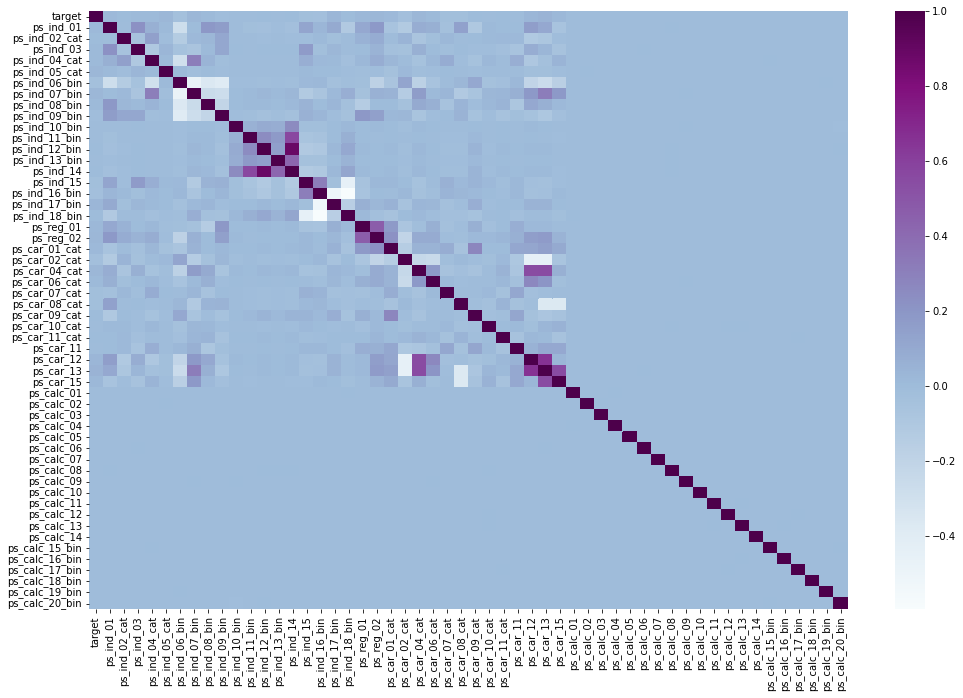

In [ ]:
#Plotting heatmap using colormap to distunguish clearly
corr_matrix = autoins_df.corr()
plt.figure(figsize=(17,11))
sns.heatmap(corr_matrix, cmap='BuPu')  

In [ ]:
#Dropping all calclated features as they have no correlation
calculated_features = [x for x in autoins_df.columns  if x.startswith("ps_calc")]
autoins_df.drop(calculated_features, axis=1, inplace=True)
print(autoins_df.columns)

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_15'],
      dtype='object')


### ENCODING CATEGORICAL FEATURES

In [ ]:
# Applying One hot encoding for categorical values
for i in autoins_df.columns:
    if 'cat' in i:
        autoins_df[i] = autoins_df[i].astype(str)

autoins_df_copy = autoins_df.copy()
autoins_df = pd.get_dummies(autoins_df, drop_first=True)
print(f'Dataset before One Hot Encoding: {autoins_df_copy.shape}')
print(f'Dataset after One Hot Encoding: {autoins_df.shape}')

Dataset before One Hot Encoding: (582847, 34)
Dataset after One Hot Encoding: (582847, 181)


### TRAIN TEST SPLIT 

In [ ]:
#Splitting the data for training and testing with 70% and 30% respectively
X = autoins_df.drop('target', axis=1)
y = autoins_df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((407992, 180), (407992,), (174855, 180), (174855,))

### FEATURE SCALING

In [ ]:
#Applying features standardization
data_scaling = StandardScaler()
X_train = data_scaling.fit_transform(X_train)
X_test = data_scaling.transform(X_test)

In [ ]:
#Defining a classifier function to train,check the metrics for different classifiers
def perform_classification(xtrain, ytrain, xtest, ytest, classifier):

    from sklearn.metrics import precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score
    
    classifier.fit(xtrain, ytrain)
    train_pred = classifier.predict(xtrain)
    train_accuracy = accuracy_score(ytrain, train_pred)

    test_pred = classifier.predict(xtest)
    test_accuracy = accuracy_score(ytest, test_pred)

    conf_matrix = confusion_matrix(ytest, test_pred)
    precision = precision_score(ytest, test_pred)
    recall = recall_score(ytest, test_pred)
    f1score = f1_score(ytest, test_pred)
    roc = roc_auc_score(ytest, test_pred)

    classi_report = classification_report(ytest, test_pred, output_dict=True)
    classi_rpt_df = pd.DataFrame(classi_report).T
    
    for i in classi_rpt_df.columns:
        classi_rpt_df[i] = round(classi_rpt_df[i], 3)
    
    display(classi_rpt_df)
    print(f'Confusion Matrix: \n{conf_matrix}')
    print(f'\nTrain_Accuracy: {round(train_accuracy*100, 1)}%')
    print(f'Test_Accuracy: {round(test_accuracy*100, 1)}%')
    print(f'Precision Score: {round(precision, 3)}')
    print(f'Recall Score: {round(recall, 3)}')
    print(f'F1 Score: {round(f1score, 3)}')
    print(f'ROC Score: {round(roc, 3)}\n')

    from sklearn import metrics
    y_pred = classifier.predict(xtest)#[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    #specificity = 1-fpr

    # ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(roc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC')
    plt.legend(loc=4)
    plt.show()
    

### DATA BALANCE

(582847, 181)


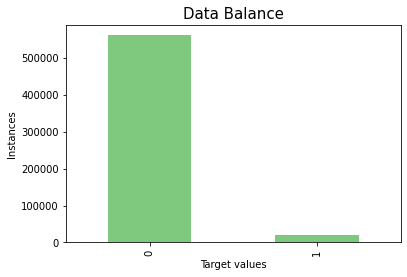

In [ ]:
#Checking the counts of claimed and not claimed
plt.title('Data Balance', fontsize=15)
plt.xlabel('Target values')
plt.ylabel('Instances')
autoins_df.target.value_counts().plot(kind='bar', cmap='Accent')
print(autoins_df.shape)

## LOGISTIC REGRESSION ON IMBALANCED DATA

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

,precision,recall,f1-score,support
0,0.965,1.000,0.982,168702.000
1,0.000,0.000,0.000,6153.000
accuracy,0.965,0.965,0.965,0.965
macro avg,0.482,0.500,0.491,174855.000
weighted avg,0.931,0.965,0.948,174855.000


Confusion Matrix: 
[[168702      0]
 [  6153      0]]

Train_Accuracy: 96.4%
Test_Accuracy: 96.5%
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0
ROC Score: 0.5



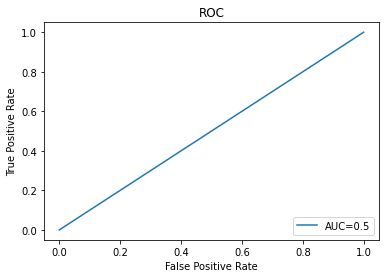

In [ ]:
#Aplying Logistic Regression
log_reg_model = LogisticRegression()
perform_classification(X_train, y_train, X_test, y_test, log_reg_model)

#### We observed that Accuracy is good but F1 score is 0. We inferred this is due to the imbalanced data. The effect of samples with class 0 is high compared to class 1. To balance the data we decided to try downsampling and upsampling techniques

## UPSAMPLING DATA OF CLASS 1 TO 100K AND DOWNSAMPLING DATA OF CLASS 0 TO 100K

In [ ]:
#Upsampling Class 1 to 100k samples and Downsampling Class 0 to 100k samples
from sklearn.utils import resample
maj_class_df = autoins_df_copy[autoins_df.target == 0]
min_class_df = autoins_df_copy[autoins_df.target == 1]
maj_class_df = maj_class_df[:100000] 

min_class = resample(min_class_df, replace=True, n_samples=100000, random_state=42) 
down_up_samp = pd.concat([maj_class_df, min_class]) 
down_up_samp.target.value_counts()

0    100000
1    100000
Name: target, dtype: int64

In [ ]:
#checking the size of data frame after sampling
down_up_samp.shape

(200000, 34)

In [ ]:
#Performing One hot encoding on the categorical features
down_up_samp = pd.get_dummies(down_up_samp, drop_first=True)
down_up_samp.shape

(200000, 181)

In [ ]:
#Splitting the sampled data for training and testing with 70% and 30% respectively
Ud = down_up_samp.drop('target', axis=1)
vd = down_up_samp.target

Ud_train, Ud_test, vd_train, vd_test = train_test_split(Ud, vd, test_size=0.3, random_state=42)
#Scaling the training and testing data
scaler = StandardScaler()
Ud_train = scaler.fit_transform(Ud_train)
Ud_test = scaler.fit_transform(Ud_test)

#checking the size of Train and Test data after sampling
Ud_train.shape, vd_train.shape, Ud_test.shape, vd_test.shape

((140000, 180), (140000,), (60000, 180), (60000,))

(200000, 181)


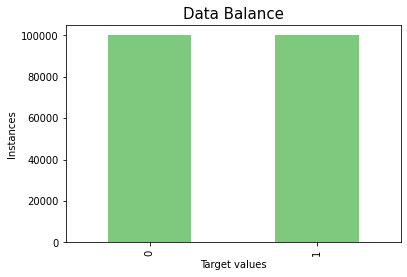

In [ ]:
#Checking the counts of claimed and not claimed
plt.title('Data Balance', fontsize=15)
plt.xlabel('Target values')
plt.ylabel('Instances')
down_up_samp.target.value_counts().plot(kind='bar', cmap='Accent')
print(down_up_samp.shape)

## LOGISTIC REGRESSION ON SAMPLED DATA

,precision,recall,f1-score,support
0,0.585,0.627,0.605,29851.000
1,0.603,0.561,0.581,30149.000
accuracy,0.593,0.593,0.593,0.593
macro avg,0.594,0.594,0.593,60000.000
weighted avg,0.594,0.593,0.593,60000.000


Confusion Matrix: 
[[18703 11148]
 [13245 16904]]

Train_Accuracy: 59.3%
Test_Accuracy: 59.3%
Precision Score: 0.603
Recall Score: 0.561
F1 Score: 0.581
ROC Score: 0.594



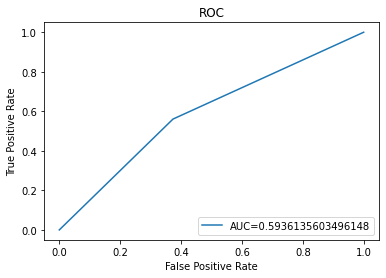

In [ ]:
#Aplying Logistic Regression on upsampled and downsampled data
log_reg_model = LogisticRegression()
perform_classification(Ud_train, vd_train, Ud_test, vd_test, log_reg_model)

## SUPPORT VECTOR CLASSIFICATION

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,precision,recall,f1-score,support
0,0.579,0.629,0.603,29851.000
1,0.598,0.547,0.571,30149.000
accuracy,0.588,0.588,0.588,0.588
macro avg,0.588,0.588,0.587,60000.000
weighted avg,0.588,0.588,0.587,60000.000


Confusion Matrix: 
[[18776 11075]
 [13671 16478]]

Train_Accuracy: 58.8%
Test_Accuracy: 58.8%
Precision Score: 0.598
Recall Score: 0.547
F1 Score: 0.571
ROC Score: 0.588



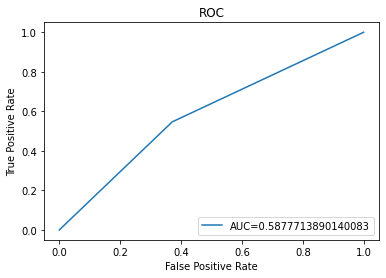

In [ ]:
#Applying Support Vector Classification on Downsampled Data
svc_model = LinearSVC()
perform_classification(Ud_train, vd_train, Ud_test, vd_test, svc_model)

## TRYING GRID SEARCH FOR SUPPORT VECTOR CLASSIFICATION

In [44]:
#Applying GridsearchCV for SVC
tuners = [{'max_iter': [2, 3, 5, 6, 7, 10, 15, 20]}]
grid_svc_model = GridSearchCV(estimator=LinearSVC(dual=False), param_grid=tuners, n_jobs=-1, scoring='f1')

grid_svc_model.fit(Ud_train, vd_train)

print(f'Best F1 Score: {round(grid_svc_model.best_score_, 3)}')
print(f'Best Max Iter:', grid_svc_model.best_estimator_.max_iter)

Best F1 Score: 0.577
Best Max Iter: 2


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,precision,recall,f1-score,support
0,0.585,0.629,0.606,29851.000
1,0.603,0.558,0.579,30149.000
accuracy,0.593,0.593,0.593,0.593
macro avg,0.594,0.593,0.593,60000.000
weighted avg,0.594,0.593,0.592,60000.000


Confusion Matrix: 
[[18763 11088]
 [13334 16815]]

Train_Accuracy: 59.3%
Test_Accuracy: 59.3%
Precision Score: 0.603
Recall Score: 0.558
F1 Score: 0.579
ROC Score: 0.593



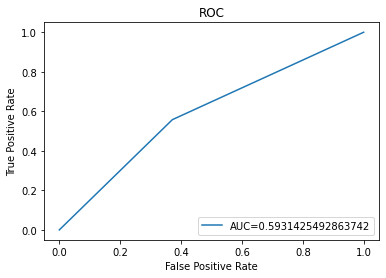

In [ ]:
perform_classification(Ud_train, vd_train, Ud_test, vd_test, grid_svc_model)

## XG BOOST CLASSIFIER

,precision,recall,f1-score,support
0,0.596,0.627,0.611,29851.000
1,0.611,0.579,0.594,30149.000
accuracy,0.603,0.603,0.603,0.603
macro avg,0.603,0.603,0.603,60000.000
weighted avg,0.603,0.603,0.603,60000.000


Confusion Matrix: 
[[18717 11134]
 [12694 17455]]

Train_Accuracy: 60.5%
Test_Accuracy: 60.3%
Precision Score: 0.611
Recall Score: 0.579
F1 Score: 0.594
ROC Score: 0.603



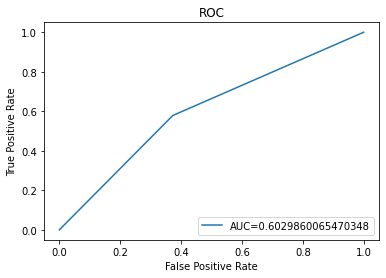

In [ ]:
#Applying XG BOOST Classifier
xbg_model = XGBClassifier(scale_pos_weight=1)
perform_classification(Ud_train, vd_train, Ud_test, vd_test, xbg_model)

## ADABOOST CLASSIFIER WITH DECISION TREE CLASSIFIER AS BASE ESTIMATOR

,precision,recall,f1-score,support
0,0.592,0.623,0.607,29851.000
1,0.606,0.574,0.590,30149.000
accuracy,0.598,0.598,0.598,0.598
macro avg,0.599,0.599,0.598,60000.000
weighted avg,0.599,0.598,0.598,60000.000


Confusion Matrix: 
[[18605 11246]
 [12845 17304]]

Train_Accuracy: 59.6%
Test_Accuracy: 59.8%
Precision Score: 0.606
Recall Score: 0.574
F1 Score: 0.59
ROC Score: 0.599



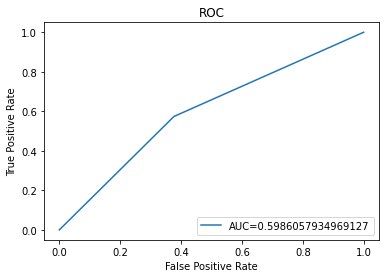

In [ ]:
#Adaboost Classifier with Decison tree as base estimator
adaboost_dec_model = AdaBoostClassifier(base_estimator=None,n_estimators=100)
perform_classification(Ud_train, vd_train, Ud_test, vd_test, adaboost_dec_model) 

## ADABOOST CLASSIFIER WITH RANDOM FOREST CLASSIFIER AS BASE ESTIMATOR

,precision,recall,f1-score,support
0,0.968,0.969,0.969,29851.000
1,0.969,0.969,0.969,30149.000
accuracy,0.969,0.969,0.969,0.969
macro avg,0.969,0.969,0.969,60000.000
weighted avg,0.969,0.969,0.969,60000.000


Confusion Matrix: 
[[28920   931]
 [  946 29203]]

Train_Accuracy: 100.0%
Test_Accuracy: 96.9%
Precision Score: 0.969
Recall Score: 0.969
F1 Score: 0.969
ROC Score: 0.969



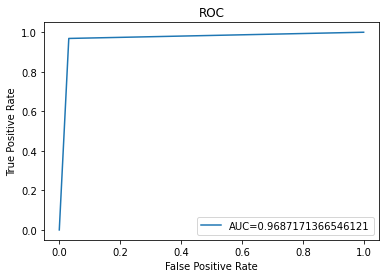

In [ ]:
#Adaboost Classifier with Random Forest as base estimator
from sklearn.ensemble import RandomForestClassifier
adaboost_randfor_model = AdaBoostClassifier(base_estimator=RandomForestClassifier())
perform_classification(Ud_train, vd_train, Ud_test, vd_test, adaboost_randfor_model) 

## K NEAREST NEIGHBORS

,precision,recall,f1-score,support
0,0.878,0.669,0.760,29851.000
1,0.735,0.908,0.812,30149.000
accuracy,0.789,0.789,0.789,0.789
macro avg,0.807,0.789,0.786,60000.000
weighted avg,0.806,0.789,0.786,60000.000


Confusion Matrix: 
[[19971  9880]
 [ 2763 27386]]

Train_Accuracy: 89.6%
Test_Accuracy: 78.9%
Precision Score: 0.735
Recall Score: 0.908
F1 Score: 0.812
ROC Score: 0.789



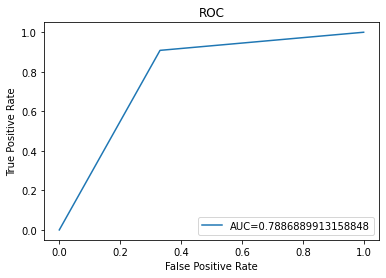

In [ ]:
#Applying K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
perform_classification(Ud_train, vd_train, Ud_test, vd_test,knn_model)

## GAUSSIAN NAIVE BAYES CLASSIFIER

,precision,recall,f1-score,support
0,0.545,0.744,0.629,29851.000
1,0.603,0.385,0.470,30149.000
accuracy,0.563,0.563,0.563,0.563
macro avg,0.574,0.564,0.549,60000.000
weighted avg,0.574,0.563,0.549,60000.000


Confusion Matrix: 
[[22209  7642]
 [18551 11598]]

Train_Accuracy: 56.4%
Test_Accuracy: 56.3%
Precision Score: 0.603
Recall Score: 0.385
F1 Score: 0.47
ROC Score: 0.564



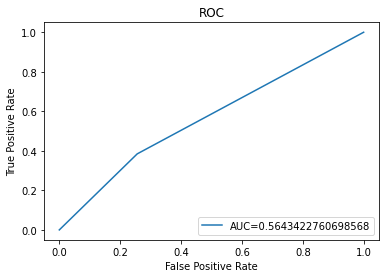

In [ ]:
#Applying Guassian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
GuassianNB_model = GaussianNB()
perform_classification(Ud_train, vd_train, Ud_test, vd_test,GuassianNB_model)

## BAGGING CLASSIFIER

,precision,recall,f1-score,support
0,0.967,0.939,0.953,29851.000
1,0.941,0.968,0.955,30149.000
accuracy,0.954,0.954,0.954,0.954
macro avg,0.954,0.954,0.954,60000.000
weighted avg,0.954,0.954,0.954,60000.000


Confusion Matrix: 
[[28032  1819]
 [  951 29198]]

Train_Accuracy: 100.0%
Test_Accuracy: 95.4%
Precision Score: 0.941
Recall Score: 0.968
F1 Score: 0.955
ROC Score: 0.954



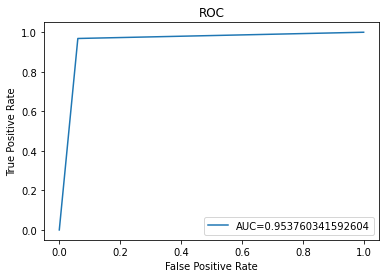

In [ ]:
#Applying Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(n_estimators=100)
perform_classification(Ud_train, vd_train, Ud_test, vd_test,bagging_model)

## ARTIFICIAL NEURAL NETWORKS

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 512, kernel_initializer="RandomNormal", activation = 'relu', input_dim =180),
    tf.keras.layers.Dense(units = 256, kernel_initializer="RandomNormal", activation = 'relu'),
    tf.keras.layers.Dense(units = 128, kernel_initializer="RandomNormal", activation = 'relu'),
    tf.keras.layers.Dense(units = 64, kernel_initializer="RandomNormal", activation = 'relu'),
    tf.keras.layers.Dense(units = 1, kernel_initializer="RandomNormal", activation = 'sigmoid')
])

In [ ]:
#Compiling the model using cross entropy loss
ann_model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [ ]:
#Training the model using validation data of 20% of train dataset
history = ann_model.fit(Ud_train, vd_train,validation_split = 0.2, epochs=20)

Epoch 1/20
3500/3500 [==============================] - 20s 5ms/step - loss: 0.6706 - accuracy: 0.5864 - val_loss: 0.6643 - val_accuracy: 0.5998
Epoch 2/20
3500/3500 [==============================] - 17s 5ms/step - loss: 0.6604 - accuracy: 0.6035 - val_loss: 0.6574 - val_accuracy: 0.6069
Epoch 3/20
3500/3500 [==============================] - 18s 5ms/step - loss: 0.6478 - accuracy: 0.6178 - val_loss: 0.6511 - val_accuracy: 0.6152
Epoch 4/20
3500/3500 [==============================] - 17s 5ms/step - loss: 0.6289 - accuracy: 0.6395 - val_loss: 0.6356 - val_accuracy: 0.6349
Epoch 5/20
3500/3500 [==============================] - 16s 5ms/step - loss: 0.6017 - accuracy: 0.6660 - val_loss: 0.6268 - val_accuracy: 0.6517
Epoch 6/20
3500/3500 [==============================] - 16s 5ms/step - loss: 0.5682 - accuracy: 0.6988 - val_loss: 0.6095 - val_accuracy: 0.6739
Epoch 7/20
3500/3500 [==============================] - 17s 5ms/step - loss: 0.5307 - accuracy: 0.7279 - val_loss: 0.5907 - val_ac

In [ ]:
# Plot Loss Function to plot learning curves
def plot_loss_curve(trained_model):

    train_loss = trained_model.history['loss']
    validation_loss = trained_model.history['val_loss']

    train_accuracy = trained_model.history['accuracy']
    validation_accuracy = trained_model.history['val_accuracy']

    epochs = range(len(trained_model.history['loss']))

    # plotting loss
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.title('Loss')
    plt.legend()

    # Plotting accuracy
    plt.figure()
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.title('Accuracy')
    plt.legend()

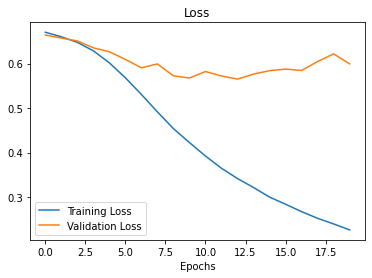

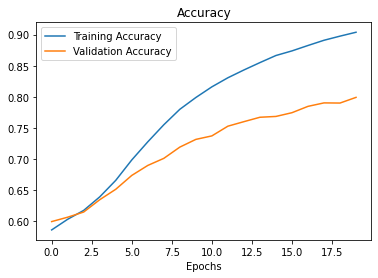

In [ ]:
#Plotting the learning curves for the trained model
plot_loss_curve(history)

In [ ]:
#Evaluating the test and train accuracies

test_loss, test_acc = ann_model.evaluate(Ud_test,vd_test, verbose=2)
train_loss, train_acc = ann_model.evaluate(Ud_train,vd_train, verbose=2)

print('\nTrain accuracy:', train_acc)
print('\nTest accuracy:', test_acc)

1875/1875 - 3s - loss: 0.6071 - accuracy: 0.7969 - 3s/epoch - 1ms/step
4375/4375 - 6s - loss: 0.2678 - accuracy: 0.9004 - 6s/epoch - 1ms/step

Train accuracy: 0.9003928303718567

Test accuracy: 0.796916663646698


In [49]:
# predictions for test set
predict_probs = ann_model.predict(Ud_test, verbose=0)
# predict bianry classes for test data set
predictions = (ann_model.predict(Ud_test) > 0.5).astype("int32")
# predict bianry classes for train data set
train_predictions = (ann_model.predict(Ud_train) > 0.5).astype("int32")

4375/4375 [==============================] - 9s 2ms/step


,precision,recall,f1-score,support
0,0.845,0.724,0.780,29851.000
1,0.761,0.869,0.811,30149.000
accuracy,0.797,0.797,0.797,0.797
macro avg,0.803,0.797,0.796,60000.000
weighted avg,0.803,0.797,0.796,60000.000


Confusion Matrix: 
[[21621  8230]
 [ 3955 26194]]

Train_Accuracy: 90.0%
Test_Accuracy: 79.7%
Precision Score: 0.761
Recall Score: 0.869
F1 Score: 0.811
ROC Score: 0.797

1875/1875 [==============================] - 3s 2ms/step


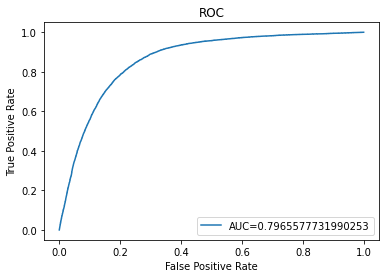

In [51]:
#Evaluation of Metrics
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
train_accuracy = accuracy_score(vd_train, train_predictions)
test_accuracy = accuracy_score(vd_test, predictions)
conf_matrix = confusion_matrix(vd_test, predictions)
precision = precision_score(vd_test, predictions)
recall = recall_score(vd_test, predictions)
f1score = f1_score(vd_test, predictions)
roc = roc_auc_score(vd_test, predictions)

classi_report = classification_report(vd_test, predictions, output_dict=True)
classi_rpt_df = pd.DataFrame(classi_report).T

for i in classi_rpt_df.columns:
    classi_rpt_df[i] = round(classi_rpt_df[i], 3)

display(classi_rpt_df)
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'\nTrain_Accuracy: {round(train_accuracy*100, 1)}%')
print(f'Test_Accuracy: {round(test_accuracy*100, 1)}%')
print(f'Precision Score: {round(precision, 3)}')
print(f'Recall Score: {round(recall, 3)}')
print(f'F1 Score: {round(f1score, 3)}')
print(f'ROC Score: {round(roc, 3)}\n')


from sklearn import metrics
pred = ann_model.predict(Ud_test)#[::,1]
fpr, tpr, _ = metrics.roc_curve(vd_test,  pred)

# ROC curve
plt.plot(fpr,tpr,label="AUC="+str(roc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()